# Semi Deviation, VaR, and CVaR

## Estimating CVaR
_There are 4 standard methodologies for calculating VaR_:
* Historical methodology (non-parameterisation)
* Variance-Covariance (parametric Gaussian)
* Parametric non-Gaussian
* Cornish-Fisher (semi-parametric)

### Historical Methodology
* Based on the distribution of historical changes
* There are no assumptions made, there is no risk of misspecification
* However, the sole reliance on historical data makes the estimation highly dependent on the sample

### Parametric Guassian Methodology
* Approaches know as parametric approachs
    * You come up with a specific assumption about the return distribution, then the focus is estimating the parameters of that return distribution
* Simple to assume a Gaussian distribution, but assuming this gives a large model risk as we have fat tails
* Example: A portfolio with a +.5% monthly expected return and 4% monthly volatility. A 95% monthly Gaussian VaR for the portfolio = -(0.5% - 1.65 x 4%) = 6.1%

### Parametric non-Gaussian
* Can be parametric but not Gaussian
* Includes distributions, like: _Pareto, Student with a>0 degrees of freedom, Loggamma, Frechet_
* There is a specification risk as the data might not fit the distribution chosen

### Cornish-Fisher
* Attempt at best of two world
* No specific return distribution is assumed
* Using Gaussian and then contains corrections in the forms of a fraction of skewness and kurtosis

In [11]:
import pandas as pd
import my_modules.risk as risk
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
hfi = risk.get_hfi_returns()

# Semideviation

In [3]:
#Measures deviations on the upside and downside. We don't care however about upside for risk
hfi.std(ddof=0) 

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [4]:
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [5]:
risk.semideviation(hfi) #Checking the method added to risk

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

# VaR and CVaR

_Caclulating VaR using three of the four standard methods_:
* Historic VaR
* Parametric VaR (Gaussian)
* Modified VaR i.e. Cornish-Fisher

## Historic var
_using a history of returns to find VaR_

In [15]:
import numpy as np

In [7]:
np.percentile(hfi, 5, axis=0) #There is a 5% chance every month to lose the given amount

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [14]:
risk.var_historic(hfi, 5)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

## Parametric VaR

In [16]:
from scipy.stats import norm

In [17]:
# Percent point function. We want to convert this to a z score to determine how far away it is from the std

In [18]:
norm.ppf(.5) #The point in the sample where half of the data is below the level 

0.0

In [19]:
# We want to have a cut of level of 5%
z = norm.ppf(.05)
z

-1.6448536269514729

In [21]:
-(hfi.mean() + z * hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [26]:
risk.var_gaussian(hfi, 5)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

## Modified VaR ~Cornish-Fisher

In [29]:
risk.var_cornish_fisher(hfi, 5)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

## Comparing the VaR calculation measures

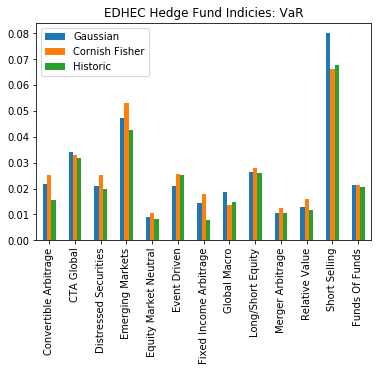

In [30]:
var_list = [risk.var_gaussian(hfi), risk.var_cornish_fisher(hfi), risk.var_historic(hfi)]
comparison = pd.concat(var_list, axis=1)
comparison.columns = ['Gaussian', 'Cornish Fisher', 'Historic']
comparison.plot.bar(title='EDHEC Hedge Fund Indicies: VaR')


## Beyond VaR (CVaR)
_Average of all the returns that are worse than VaR_

In [33]:
# If the worst five percent occurs, than the average loss in a month is:
risk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64